### The Sparks Foundation
## Prediction using UnSupervised Learning
## BY SAKSHI SATAYE

### Task 2: Determining Optimal Clusters in the Iris Dataset Using K-Means Clustering

In [50]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading data from remote link
df = pd.read_csv('Iris.csv')
print("Data imported successfully")

Data imported successfully


In [4]:
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
#Checking null values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
#Checking duplicate values
df.duplicated().value_counts()

False    150
Name: count, dtype: int64

In [67]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### **Preparing the data**

In [10]:
x=df.iloc[:,1:-1]
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# Finding the optimum number of clusters for k-means classification

In [12]:
from sklearn.cluster import KMeans

In [15]:
wcs=[]
for i in range(1,11):
    km=KMeans(i,init='k-means++',max_iter=300,n_init=10,random_state=1)
    km.fit(x)
    wcs.append(km.inertia_)

In [16]:
wcs

[680.8244,
 152.36870647733906,
 78.94084142614602,
 57.345409315718165,
 46.535582051282056,
 39.18020672938385,
 34.36574278696132,
 30.207410380445545,
 28.25091058941059,
 26.60462262734897]

## **Elbow Method**

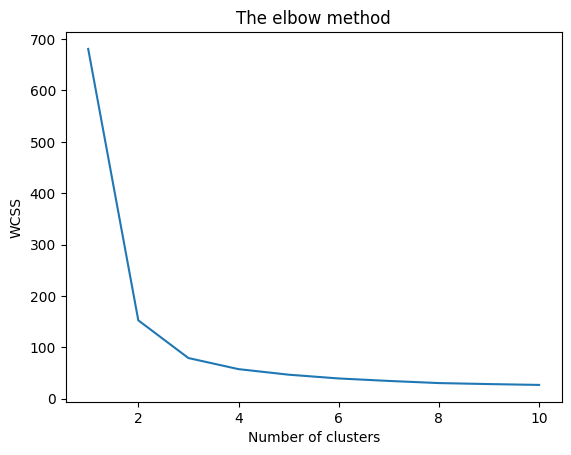

In [17]:
# Plotting the results onto a line graph, 
plt.plot(range(1, 11), wcs)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [18]:
#best k=3

In [41]:
#best model
km1=KMeans(n_clusters=3,init='k-means++',n_init=10,max_iter=300,random_state=1)
labels=km1.fit_predict(x)

In [42]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [43]:
km1.inertia_

78.94084142614602

In [44]:
#printing value of centroids
km1.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [45]:
df["groups"]=labels

In [46]:
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,groups
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1


In [47]:
df.tail(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,groups
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,0
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2
149,150,5.9,3.0,5.1,1.8,Iris-virginica,0


In [62]:
centroid_df = pd.DataFrame(km1.cluster_centers_,columns=[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])
centroid_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.901613,2.748387,4.393548,1.433871
1,5.006000,3.418000,1.464000,0.244000
2,6.850000,3.073684,5.742105,2.071053


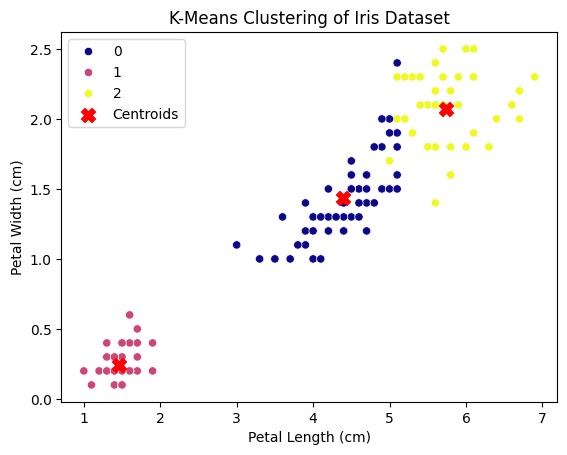

In [69]:
sns.scatterplot(data=df, x=df['PetalLengthCm'], y=df['PetalWidthCm'], hue=df['groups'], palette='plasma', legend='full')
plt.scatter(centroid_df['PetalLengthCm'], centroid_df['PetalWidthCm'], s=100, c='red', marker='X',label = 'Centroids')
plt.title('K-Means Clustering of Iris Dataset')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()
plt.show()

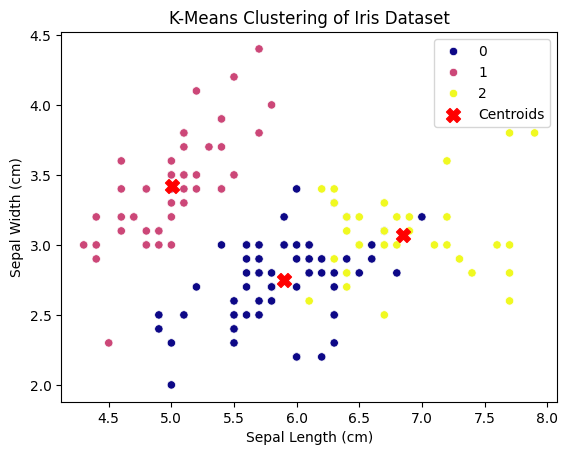

In [70]:
sns.scatterplot(data=df, x=df['SepalLengthCm'], y=df['SepalWidthCm'], hue=df['groups'], palette='plasma', legend='full')
plt.scatter(centroid_df['SepalLengthCm'], centroid_df['SepalWidthCm'], s=100, c='red', marker='X',label = 'Centroids')
plt.title('K-Means Clustering of Iris Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()